In [ ]:
import pandas as pd

df = pd.read_csv("path_to_comment_topics_dataset.csv", index_col=0)
df.head()

,post_title,comment_text,upvotes,Topic Label,Topic id
0,Canada retaliating for Trump’s tariffs with 25...,American here. Canada and Mexico are respondin...,8725,trump - government - president,-1
1,Canada retaliating for Trump’s tariffs with 25...,It won't just be Canada and Mexico. That's ju...,4884,trump - government - president,-1
2,Canada retaliating for Trump’s tariffs with 25...,As an American I really wish we invested in ed...,3471,education - miseducation - indoctrinating,44
3,Canada retaliating for Trump’s tariffs with 25...,"I mean, doesn't surprise me. I hope the Candia...",2610,canadians - canadian - canada,11
4,Canada retaliating for Trump’s tariffs with 25...,Trudeau talking to Americans directly saying i...,2214,trump - government - president,-1


/var/folders/fm/6864gyc53mv82ykl619mvmxm0000gn/T/ipykernel_18067/283072975.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_counts.values[1:21], y=topic_counts.index[1:21], palette="viridis")


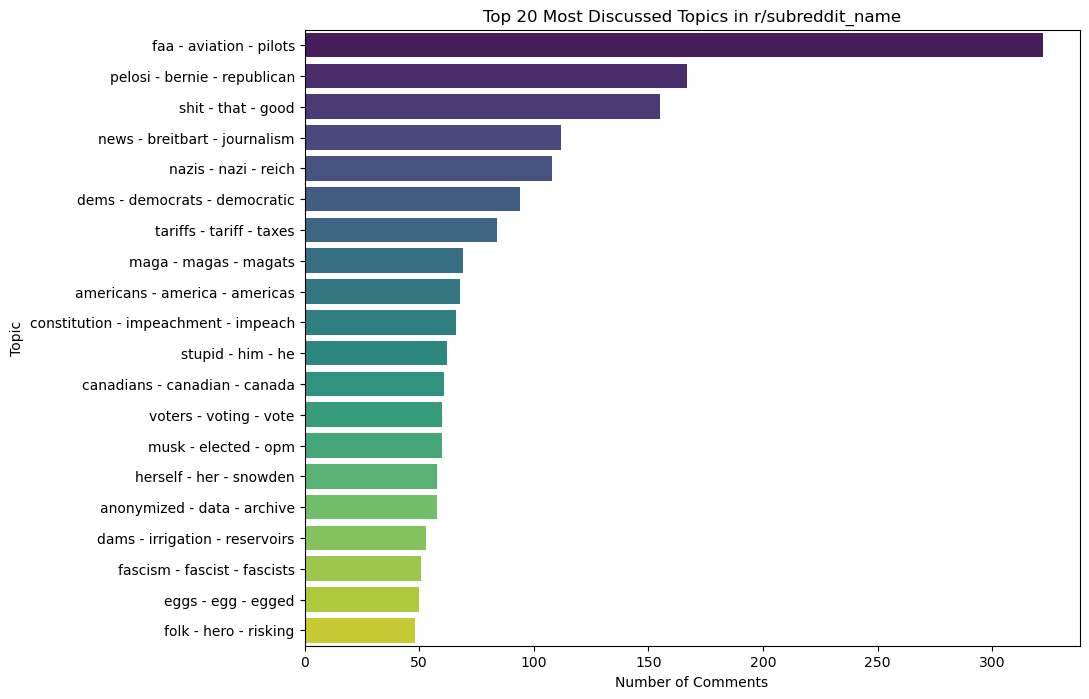

In [ ]:
# Visualize the most discussed topics on a subreddit

import matplotlib.pyplot as plt
import seaborn as sns 

topic_counts = df['topic_label'].value_counts()

plt.figure(figsize=(10, 8))
sns.barplot(x=topic_counts.values[1:21], y=topic_counts.index[1:21], palette="viridis")
plt.xlabel('Number of Comments')
plt.ylabel("Topic")
plt.title("Top 20 Most Discussed Topics in r/subreddit_name")
plt.show()

In [ ]:
from bertopic import BERTopic # Load the topic model

topic_model = BERTopic.load("path_to_model_directory")

/opt/anaconda3/envs/sa/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
from transformers import pipeline # Load the model for emotion classification
classifier = pipeline("text-classification",model='MilaNLProc/xlm-emo-t',top_k=1)

In [ ]:
df['sentiment'] = df['comment_text'].apply(lambda x: classifier(str(x)[:514])) # Get emotions for each comment
df.head()

In [ ]:
def get_sentiment(text): # Add a more readable column 
    if 'anger' in text: 
        return 'anger'
    elif 'sadness' in text: 
        return 'sadness'
    elif 'joy' in text: 
        return 'joy'
    else: 
        return 'fear'
   
df['sentiment_label'] = df['sentiment'].apply(get_sentiment)
df.head()

df.to_csv("path_to_comments_with_emotions.csv") # Store the new data frame including emotions in a CSV file

In [ ]:
emotion_counts = df['sentiment_label'].value_counts() # Get emotion counts 
print(emotion_counts)

In [ ]:
# Plot the distribution of comments across emotions
import matplotlib.pyplot as plt 

colors = ["#1E90FF", "#4682B4", "#5F9EA0", "#87CEFA"]  

plt.figure(figsize=(8, 6))
plt.bar(emotion_counts.index, emotion_counts.values, color=colors)

plt.xlabel("Emotions")
plt.ylabel("Number of Comments")
plt.title("Distribution of Comments Across Emotions")
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()

In [ ]:

#Compute and sort average upvotes per emotion
avg_upvotes_per_emotion = df.groupby("sentiment_label")["upvotes"].mean().sort_values(ascending=False)

warm_colors = ["#D73027", "#FC8D59", "#FEE08B", "#91CF60"]  #Red, Orange, Yellow, Light Green

plt.figure(figsize=(8, 6))
plt.bar(avg_upvotes_per_emotion.index, avg_upvotes_per_emotion.values, color=warm_colors)

plt.xlabel("Emotion")
plt.ylabel("Average Upvotes")
plt.title("Average Upvotes Across Emotions")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


In [ ]:
top_100_upvotes_df = df.nlargest(100, 'upvotes') # Create a data frame with the top 100 upvotes
top_100_upvotes_df.head()
top_100_upvotes_df.to_csv("path/datasets/top50_upvotes.csv") 

In [ ]:
top_100_upvotes_emotion_count = top_100_upvotes_df['sentiment_label'].value_counts() # Get the emotion counts of the 100 most upvoted comments

In [ ]:
print(top_100_upvotes_emotion_count)

In [ ]:
colors = ["#1E90FF", "#4682B4", "#5F9EA0", "#87CEFA"]  

# Plot the distribution of top 100 upvoted comments across the four emotions

plt.figure(figsize=(14, 6))
plt.bar(top_100_upvotes_emotion_count.index, top_100_upvotes_emotion_count.values, color=colors)

plt.xlabel("Emotions")
plt.ylabel("Number of upvotes")
plt.title("Distribution of Comments Across Emotions") 
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()

In [ ]:
df_topic = df[df['topic_label'] == 'enter_topic'] # Build a topic data frame 
df_topic.head()

In [ ]:
topic_emotion_counts = df_topic['sentiment_label'].value_counts() # Count the emotions of a specific topic
print(topic_emotion_counts)

In [ ]:
topic_model.visualize_barchart(top_n_topics=10) # Visualize the distribution of emotions across the top n topics